In [5]:
import torch
torch.manual_seed(123)
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.nn.functional as F
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.  
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
from torchvision import datasets
import os
import pandas as pd
import PIL
import time
import numpy as np
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  # Gives easier dataset managment and creates mini batches
import matplotlib.pyplot as plt


In [6]:
# Load Data
transform =transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((32, 32)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set=torchvision.datasets.ImageFolder(root="New_data/Train",transform=transform)
valid_set=torchvision.datasets.ImageFolder(root="New_data/Valid",transform=transform)
#print(type(train_set))

In [7]:
#train_set, test_set = torch.utils.data.random_split(dataset, [9325, 3996])
train_loader = DataLoader(dataset=train_set, batch_size=4, shuffle=True)
valid_loader = DataLoader(dataset=valid_set, batch_size=4, shuffle=False)
classes=('Down','Normal')

print(valid_loader)
print(train_loader)

<class 'torch.Tensor'>


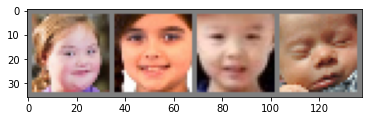

 Down Normal Normal  Down


In [8]:
def imshow(train_set):
    train_set = train_set / 2 + 0.5     # unnormalize
    npimg = train_set.numpy() # convert train_set to np
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # to display images on x axis
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(labels)) #type of label= tensor, type of image is tensor

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))#its max value =4(batch size) 

In [9]:
#CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [11]:
#Loss Fun. and Optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [12]:
start_time = time.time()
for epoch in range(10):
    # loop over the dataset multiple times to train model on train_set
    
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #print(inputs.dtype)
        #print(labels.dtype)
        #print(outputs.dtype)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    
print('Finished Training')
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\zeinab walid\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


[1,    20] loss: 0.697
[1,    40] loss: 0.609
[1,    60] loss: 0.504
[2,    20] loss: 0.210
[2,    40] loss: 0.149
[2,    60] loss: 0.188
[3,    20] loss: 0.135
[3,    40] loss: 0.073
[3,    60] loss: 0.083
[4,    20] loss: 0.020
[4,    40] loss: 0.131
[4,    60] loss: 0.077
[5,    20] loss: 0.102
[5,    40] loss: 0.030
[5,    60] loss: 0.015
[6,    20] loss: 0.004
[6,    40] loss: 0.008
[6,    60] loss: 0.022
[7,    20] loss: 0.005
[7,    40] loss: 0.000
[7,    60] loss: 0.006
[8,    20] loss: 0.001
[8,    40] loss: 0.001
[8,    60] loss: 0.000
[9,    20] loss: 0.000
[9,    40] loss: 0.001
[9,    60] loss: 0.000
[10,    20] loss: 0.000
[10,    40] loss: 0.000
[10,    60] loss: 0.000
Finished Training
--- 19.507474422454834 seconds ---


In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
## acc of train images
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the  val images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  val images: 100 %


In [15]:
## acc of each class on train data

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)

        if(labels.size()==torch.Size([4])):
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  Down : 100 %
Accuracy of Normal : 100 %


Confusion matrix, without normalization
[[142   0]
 [  0 116]]


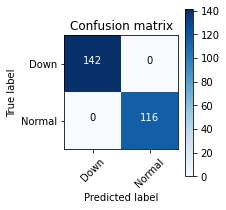

In [16]:
## plot confusion matrix for train data
from sklearn.metrics import confusion_matrix

target_arr = np.empty([0])
pred_arr = np.empty([0,0])
for data in train_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    targets = labels.numpy()
    pred = predicted.numpy()
    target_arr = np.append(target_arr, targets)
    pred_arr = np.append(pred_arr, pred)

cm = confusion_matrix(target_arr, pred_arr)

plt.figure(figsize=(3,3))
plot_confusion_matrix(cm, classes)

In [36]:
model=Net()
PATH="saved_model.pt"
torch.save(model.state_dict(), PATH)

In [37]:
model=Net()
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [17]:
#Test the network on the test data (1 batch only)
dataiter = iter(valid_loader)
images, labels = dataiter.next()

# print images
#imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:   Down  Down  Down  Down


In [18]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)


print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   Down  Down  Down Normal


In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 20 validation images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 20 validation images: 95 %


In [20]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        if(labels.size()==torch.Size([4])):
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of  Down : 90 %
Accuracy of Normal : 100 %


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


Prediction in progress


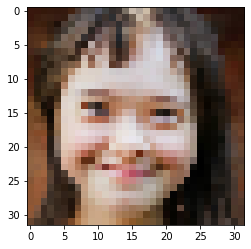

new_Img:    D o w n


In [23]:
from PIL import Image
from torch.autograd import Variable
#from IPython.display import Image
def predict_image(image_path):
    print("Prediction in progress")
    image = Image.open(image_path)

    # Define transformations for the image, should (note that imagenet models are trained with image size 224)
    transformation = transforms.Compose([
                     transforms.ToTensor(),
                     transforms.Resize((32, 32)),
                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # Preprocess the image
    image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
    image_tensor = image_tensor.unsqueeze_(0)

    #if torch.cuda.is_available():
        #image_tensor.cuda()

    # Turn the input into a Variable
    input = Variable(image_tensor)

    # Predict the class of the image
    output = net(input)

    index = output.data.numpy().argmax()

    return index,image_tensor  #class_map[str(index)][1]
index,image_tensor = predict_image("New_data/test_data/9.png")
imshow(torchvision.utils.make_grid(image_tensor))
print('new_Img: ', ' '.join('%5s' % classes[index]))